# The sales and tips of an unnamed restaurant
## What days should my work close down? And what shifts should I exclusively take?


I am currently working (and have been for the last 5 years) at a dinner restaurant in central Stockholm. I have now decided to take a look at some numbers available with the new knowledge I have got from MT4007. 

Because I am going to present sales numbers, my boss, who allowed me to use the data, has asked me not to publish the name of the restaurant. Because of this, and that some documents contain information about some co-workers, I have removed all original files and my work on them from this folder. 

The data I was given was:

- Total sales per day since March 2022. (In some really weird csv files that needed some work)
  
- Total bookings per day since May 2016. One booking is one person, and we also add all dropins, basically all guests are counted. (This was provided in a clean, easy to read, csv file)

- All tips (I will refer to tips as "Extra" mostly in this post) gained per day since June 2018 and also how it was distributed each day. We distribute extra equally for everyone working, based on how many hours that person worked that day. That means this data contained information about all workers, how many hours they worked and how much extra they earned, each specific day. This data was in the form of excel files, one for each month, and scanning them into a usable dataframe took some time. I have not included any personal data except for the data regarding myself, Benjamin. 

- A csv file containing information about the weather in Stockholm for each day, taken from an open API from https://open-meteo.com/

In this post I will only use data from march 2022 and forward. This was mainly because I don't have any sales data from before that, but it also works nice because the last 2-3 years of the restaurant have had few changes (similar menu, prices, staff etc) and therefore is probably more relevant than data from 2016. 

The post will be divided into two parts. The first focusing on sales numbers that might be interesting for my boss to know, if we can find any pattern that could anticipate high or low sales (that could help them to know for example how much food they should prep or employees to schedule). The second part will be in a less serious matter, focusing on how I personally can maximize my income (my salary is of course the same but the extra I get from tips varies). 


In [1]:
import pandas as pd

df = pd.read_csv("main.csv")
df['Date'] = pd.to_datetime(df['Date'])
# Move 'Date' to the first column
df = df[['Date'] + [col for col in df.columns if col != 'Date']]
# Define a mapping of the abbreviations to full weekday names
weekday_mapping = {
    'tis': 'Tuesday',
    'ons': 'Wednesday',
    'tors': 'Thursday',
    'fre': 'Friday',
    'lör': 'Saturday'
}
# Apply the mapping to the 'Weekday' column
df['Weekday'] = df['Weekday'].replace(weekday_mapping)

weather = pd.read_csv("open_meteo.csv")
weather = weather.drop(columns=['temperature_2m_max (°C)', 'temperature_2m_min (°C)'])
weather.rename(columns={
    'time': 'Date',
    'weather_code (wmo code)': 'wmo code',
    'temperature_2m_mean (°C)': 'temperature(°C)',
    'rain_sum (mm)': 'rain (mm)',
    'snowfall_sum (cm)': 'snowfall (cm)'
}, inplace=True)

## Part One; Sales in general

First let's have a look at the dataframe with all information from the restaurant. The dataframe has the columns that are shown below plus the columns "Date" and "Weekday" and the rows are all different days (that the restaurant was open) from march 2022. The table presented below is the average in all categories, based on weekdays.


In [2]:
numeric_df = df.drop(columns=['Weekday', 'Date'])
weekday_means = numeric_df.groupby(df['Weekday']).mean()
weekday_means = weekday_means.drop(index='tor')
print(weekday_means)

                  Sales        Extra    Extra%    Bookings  Sales/Booking  \
Weekday                                                                     
Friday     66430.269141  4035.212344  0.060695   91.210938     730.663972   
Saturday   82563.446457  4971.218583  0.060069  119.740157     691.862545   
Tuesday    48680.118110  3125.717087  0.064078   73.614173     661.421601   
Wednesday  50621.538846  3092.645615  0.061067   74.815385     681.319218   

           Extra/Booking  BenjaminExtra  BenjaminHours  Benjamin_Extra/h  
Weekday                                                                   
Friday         44.275503     487.177200       7.117150         68.317418  
Saturday       41.667473     576.842254       8.150000         70.952895  
Tuesday        42.518206     456.591122       6.798507         66.914285  
Wednesday      41.780267     428.345602       6.747475         63.472878  


Why this is important is to see that the sales differs a lot between saturday (most), friday (middle) and tuesday + wednesday (least). So now when I am now going to plot the sales I will have to divide it into three different ones (otherwise it was hard to read). Also good to know is that the restaurant is closed sunday, monday, thursday and that on saturdays it opens up 3 hours earlier. Below is the sales over time, based on weekdays.

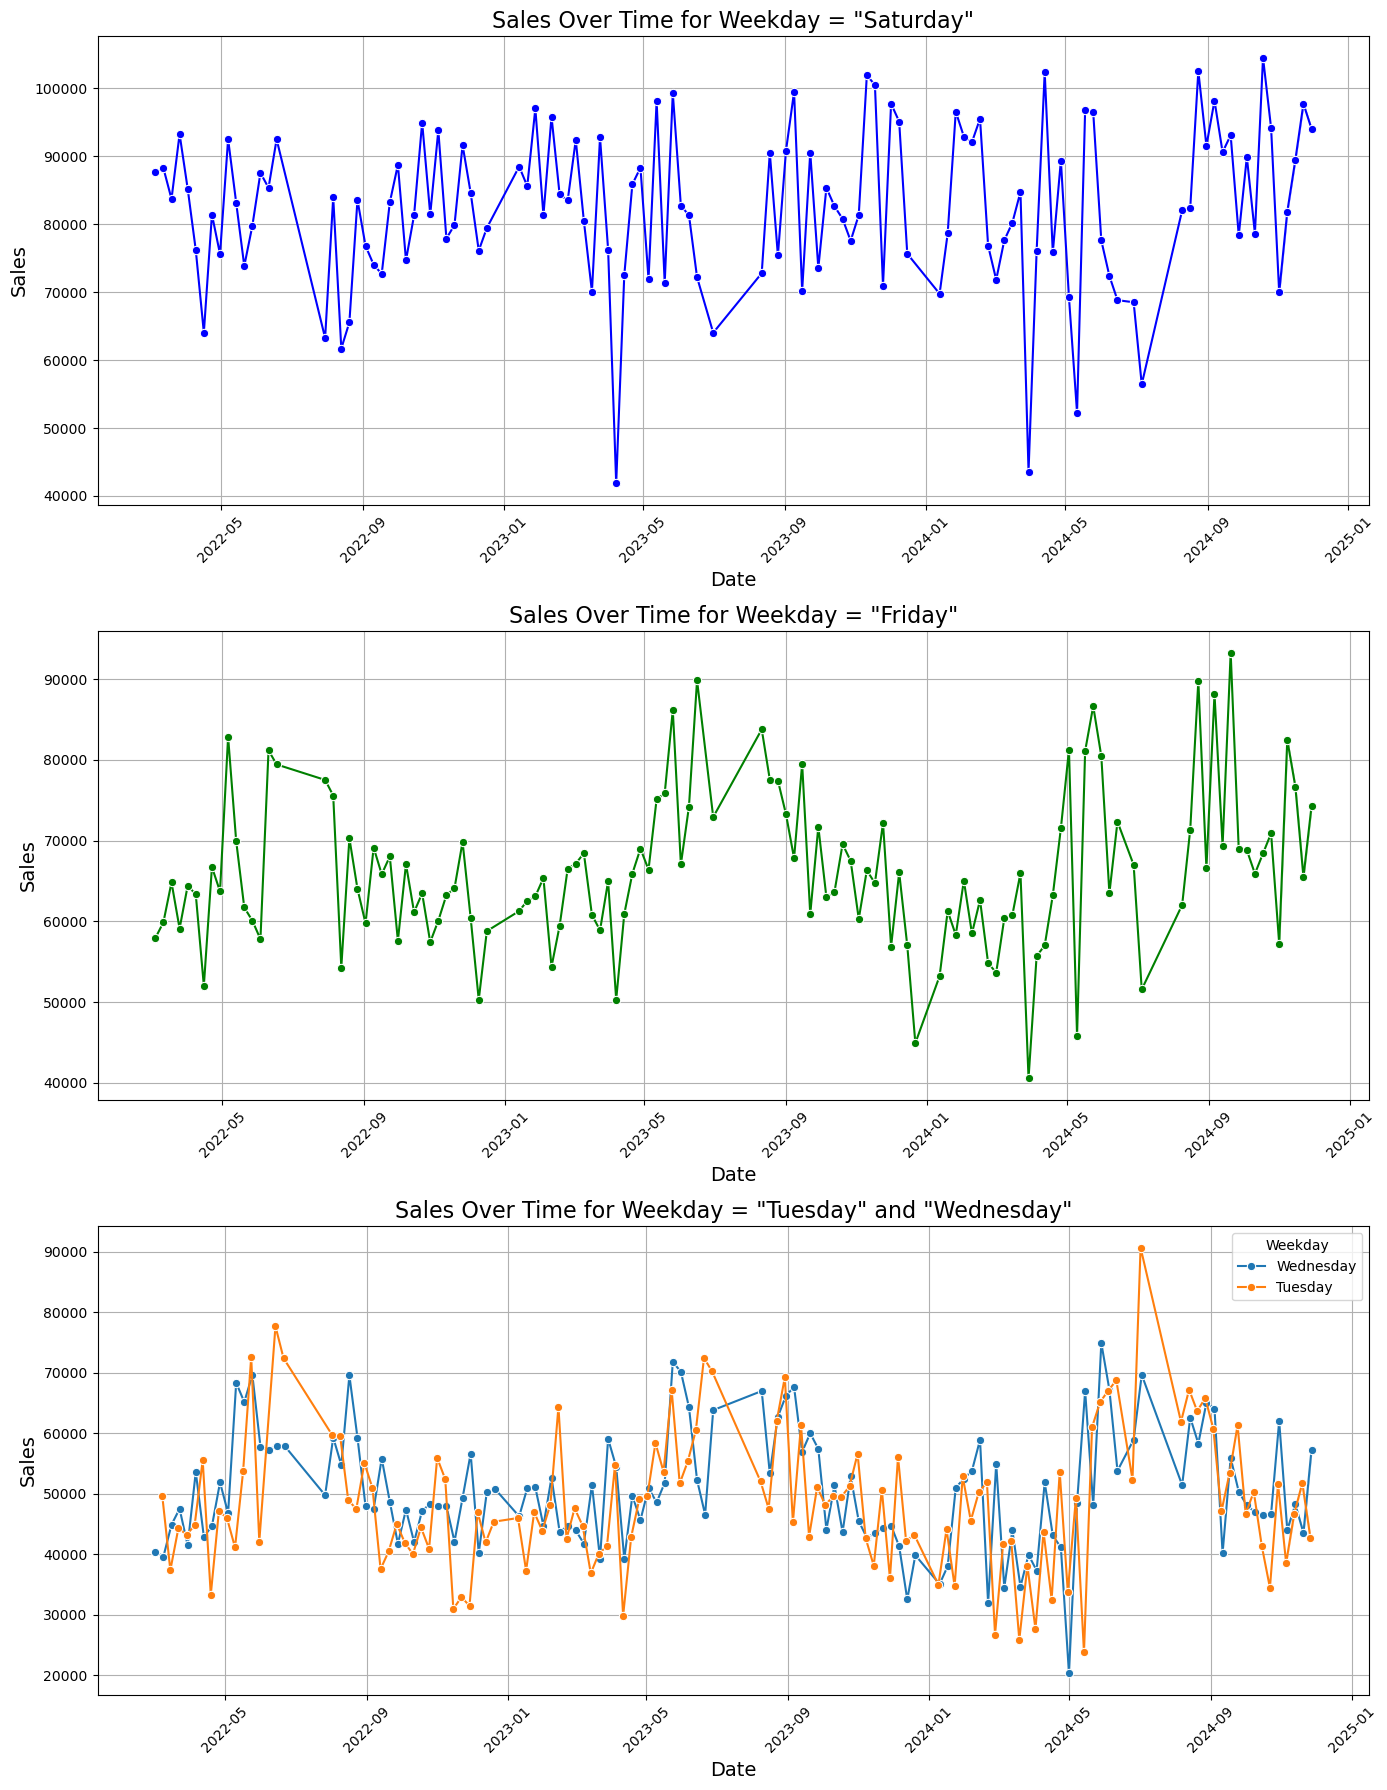

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for each condition with the updated weekday names
df_lor = df[df['Weekday'] == 'Saturday']
df_fre = df[df['Weekday'] == 'Friday']
df_tis_ons = df[df['Weekday'].isin(['Tuesday', 'Wednesday'])]

# Set plot size
plt.figure(figsize=(14, 18))

# Plot for 'Saturday'
plt.subplot(3, 1, 1)
sns.lineplot(data=df_lor, x='Date', y='Sales', marker='o', color='blue')
plt.title('Sales Over Time for Weekday = "Saturday"', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)  
plt.grid(True)

# Plot for 'Friday'
plt.subplot(3, 1, 2)
sns.lineplot(data=df_fre, x='Date', y='Sales', marker='o', color='green')
plt.title('Sales Over Time for Weekday = "Friday"', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45) 
plt.grid(True)

# Plot for 'Tuesday' and 'Wednesday' combined
plt.subplot(3, 1, 3)
sns.lineplot(data=df_tis_ons, x='Date', y='Sales', hue='Weekday', marker='o', palette='tab10')
plt.title('Sales Over Time for Weekday = "Tuesday" and "Wednesday"', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45) 
plt.legend(title='Weekday')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

The different plots show some days that are more interesting than others that we can look into. For me the most interesting is:

- Saturdays; The four lowest sales, and especially the difference between what looks to be the second lowest and second or third highest sales that are only two weeks apart.

- Fridays; The Fridays in may 2024 all look to be around 80k+ sales except for the second one that drops below 50k.

- Tuesday/Wednesday; The top result stands out. Unfortunately I have not been able to find any interesting pattern and will therefore not write more about it.

Now let's find and look at the relevant dates, starting with saturdays. I will also use the data from the weather dataframe to see if that could have any impact. These are the 4 lowest sales and the weather of those days:

In [4]:
lowest_sales_dates_lor = df_lor.nsmallest(4, 'Sales')['Date'].tolist()
weather['Date'] = pd.to_datetime(weather['Date'])
weather_for_lowest_sales = weather[weather['Date'].isin(lowest_sales_dates_lor)]
weather_for_lowest_sales = weather_for_lowest_sales.set_index('Date')
print(weather_for_lowest_sales)

            wmo code  temperature(°C)  rain (mm)  snowfall (cm)
Date                                                           
2023-04-08         3              4.1        0.0            0.0
2024-03-30        51              6.9        0.2            0.0
2024-05-11         3              9.2        0.0            0.0
2024-07-06        61             14.9        4.0            0.0


To explain (simplified) the wmo codes; 0 is no clouds, 1-3 is some clouds, 50-53 is drizzle ,60-65 is rain (higher number=more rain). Drawing conclusions from this is hard because the weather is different these days, but the sales are low for all.

When I instead look in a calendar I can see that 2023-04-08 and 2024-03-30 was Easter eve. 2024-05-11 was the Saturday of the week of "Kristi himmelfärd". These are weekends that many in Stockholm leave town so that seems to be a much better explanation than the weather.  2024-07-06 is also a special date because it is the last day before we close for summer (usually closed from first week in july - first week in august). This combined with rain and cold weather (for July) could actually explain the low sales. 

Then let's check the Fridays in May 2024.

In [5]:
may2024_sales_dates_fre = df_fre[(df_fre['Date'].dt.year == 2024) & (df_fre['Date'].dt.month == 5)]
weather_for_friday_sales = weather[weather['Date'].isin(may2024_sales_dates_fre['Date'])]
weather_for_friday_sales = weather_for_friday_sales.set_index('Date')
may2024_sales_dates_fre = may2024_sales_dates_fre.set_index('Date')
may2024_sales_dates_fre = may2024_sales_dates_fre.drop(columns=['BenjaminExtra', 'Benjamin_Extra/h', 'Extra/Booking', 'Sales/Booking' , 'Weekday'])
print(may2024_sales_dates_fre)

              Sales    Extra    Extra%  Bookings  BenjaminHours
Date                                                           
2024-05-03  81253.0  5685.80  0.069976     110.0       7.883333
2024-05-10  45859.0  2670.40  0.058231      71.0            NaN
2024-05-17  81109.5  4741.35  0.058456     115.0       7.366667
2024-05-24  86670.0  4680.32  0.054002     124.0       8.200000
2024-05-31  80481.0  5253.10  0.065271     118.0       7.616667


We can see that both sales and bookings are a lot lower on the 10th. The conclusion here is obviously that I (Benjamin) was not working. 

Jokes aside, let's have a look at the weather for May 2024.

In [6]:
print(weather_for_friday_sales)

            wmo code  temperature(°C)  rain (mm)  snowfall (cm)
Date                                                           
2024-05-03         2             10.2        0.0            0.0
2024-05-10         3              8.8        0.0            0.0
2024-05-17         1             15.2        0.0            0.0
2024-05-24        63             16.7        7.9            0.0
2024-05-31        51             18.9        0.1            0.0


Even though the 10th is the coldest, it is not so much different from the 3rd. The 24th actually had some heavy rain but it does not seem to affect the sales. The answer can once again be found in that the 10th was the week of "Kristi Himmelsfärd".

So, the conclusion for the first part will is:

The Easter and "Kristi Himmelfärd" actually affect the sales alot negatively, so it could be worth closing on these weekends (like the restaurant does for Midsummer and Christmas) or atleast bring in fewer workers these days.

## Part Two; How to earn extra

Now, let's look into to the more important thing;

What days should I work to get the most amount of extra?

We will start by looking at what day of the week, what day of the month and what month of the year have the highest average in some categories. These categories will be Extra, Extra/Booking, Extra%, BenjaminExtra and Benjamin_Extra/h.

In [7]:
# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the week, day of the month, and month from the 'Date' column
df['DayOfWeek'] = df['Date'].dt.day_name()  # Day of the week (e.g., Monday, Tuesday)
df['DayOfMonth'] = df['Date'].dt.day  # Day of the month (1, 2, ..., 31)
df['Month'] = df['Date'].dt.month_name()  # Month name (January, February, ..., December)

# Categories to analyze
categories = ['Extra', 'Extra/Booking', 'Extra%', 'BenjaminExtra', 'Benjamin_Extra/h']

# Group by Day of Week, Day of Month, and Month, then calculate the mean for each category
# Create DataFrames for each grouping
df_dayofweek = df.groupby('DayOfWeek')[categories].mean()
df_dayofweek = df_dayofweek.drop('Thursday')
df_dayofmonth = df.groupby('DayOfMonth')[categories].mean()
df_month = df.groupby('Month')[categories].mean()

# Display the DataFrames
print("Average by Day of the Week:")
print(df_dayofweek.to_string(index=True))

print("\nAverage by Day of the Month:")
print(df_dayofmonth.to_string(index=True))

print("\nAverage by Month of the Year:")
print(df_month.to_string(index=True))

Average by Day of the Week:
                 Extra  Extra/Booking    Extra%  BenjaminExtra  Benjamin_Extra/h
DayOfWeek                                                                       
Friday     4035.212344      44.275503  0.060695     487.177200         68.317418
Saturday   4971.218583      41.667473  0.060069     576.842254         70.952895
Tuesday    3125.717087      42.518206  0.064078     456.591122         66.914285
Wednesday  3092.645615      41.780267  0.061067     428.345602         63.472878

Average by Day of the Month:
                  Extra  Extra/Booking    Extra%  BenjaminExtra  Benjamin_Extra/h
DayOfMonth                                                                       
1           3300.838095      40.010619  0.057749     515.206327         72.807447
2           3537.612727      39.672017  0.058577     429.696916         62.631460
3           4012.360000      43.622022  0.064377     547.921799         70.235439
4           3740.818333      42.637782  0.0585

So what can be said from all of this? If my goal is to get as much extra as possible, then we should look at the "Extra" column combined with the "BenjaminExtra" column.

Saturday is the clear winner in both categories.

For what day of the month we could look at it in different ways. We could divide the month into 3 parts and see if early, middle or late in the month is most profitable. But from reading this data we can see that the 23rd actually has the highest value in both categories.

When we start looking at months it gets more interesting. We can see that the summer months have the highest total extra but for me individually it is not like that. This can be explained with that in the summer the restaurant opens up outdoor seating that results in more guests (=more extra) but also more personal working (more to share with). In this case I am actually not interested in how much extra my colleagues get, I am looking to figure out what day is most profitable for me. In that case we can see that December actually stands out and the summer months are among the lowest results.

In conclusion: If I could only work one day for the next seven years, then I should work on December 23rd the year when it occurs on a saturday. Of Course this all falls apart because a) We saw earlier that holidays like Easter resulted in the worst sales and b) the restaurant is always closed for Christmas.

Let us then instead look at the other categories; Extra/booking, Extra% and Benjamin_Extra/h. If I would like to find out what days I should work to get the most extra with the least effort, these are the categories to look at. Here I think Benjamin_Extra/h is the most important, because working long days is the most exhausting. But we should also look at Extra/booking and Extra%, because less guests or less sales (which is what Extra% mean) also usually mean less work.

Saturdays have the most Extra/h but seeing that Fridays are second in that category, and outclassing Saturdays in Extra/Booking, I would actually argue that Fridays are the most profitable day of the week.
I think that looking into the day of the month category actually is more interesting to do the way I wrote about earlier, dividing the month in three categories. So I will do that to analyze the result.

In [8]:
# Create a new column 'MonthPeriod' to categorize the days into Start, Middle, and End of the month
def categorize_period(day):
    if 1 <= day <= 10:
        return 'Start of the Month'
    elif 11 <= day <= 20:
        return 'Middle of the Month'
    else:
        return 'End of the Month'

# Apply the categorize_period function to the 'DayOfMonth' column
df['MonthPeriod'] = df['DayOfMonth'].apply(categorize_period)

# Group by the new 'MonthPeriod' column and calculate the mean for each category
df_month_period = df.groupby('MonthPeriod')[categories].mean()

# Display the new DataFrame with the categorized periods
print("Average by Month Period:")
print(df_month_period.to_string(index=True))

Average by Month Period:
                           Extra  Extra/Booking    Extra%  BenjaminExtra  Benjamin_Extra/h
MonthPeriod                                                                               
End of the Month     3788.575256      43.571071  0.062878     506.591622         69.656110
Middle of the Month  3635.916140      41.894616  0.060457     468.411099         65.333644
Start of the Month   3647.950190      42.175251  0.061104     465.523151         67.336778


We can see that the end of the month is the winner in all categories, followed by the start of the month. So I should definitely avoid the middle of the month if possible, leaning more to the end than the beginning.  

Looking at the months, we can see that December wins again in Benjamin_Extra/h, but it is really hard to make patterns if we include the other two categories. Like I wrote earlier, the extra per hour category is the most important one, so if choosing only one month then it would be December. But we can actually do what we did with the months, dividing the year into seasons.

In [9]:
# Create a mapping of months to seasons
season_mapping = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer', 'September': 'Fall', 'October': 'Fall',
    'November': 'Fall', 'December': 'Winter'
}

# Apply the mapping to the 'Month' column to create a new 'Season' column
df['Season'] = df['Month'].map(season_mapping)

# Group by the 'Season' column and calculate the mean for each category
df_season = df.groupby('Season')[categories].mean()

# Display the new DataFrame with the categorized seasons
print("Average by Season:")
print(df_season)


Average by Season:
              Extra  Extra/Booking    Extra%  BenjaminExtra  Benjamin_Extra/h
Season                                                                       
Fall    3743.319908      42.723364  0.061502     483.992797         68.986299
Spring  3498.178274      41.086770  0.060731     491.023713         69.047603
Summer  4174.226750      44.552009  0.062963     439.266858         62.015064
Winter  3396.098491      42.647365  0.061109     517.575401         69.366502


From this the biggest conclusion to draw is actually that I should not work during the summer. The categories that are not based on my personal extra actually have the highest results during the summer, but personally the summer have the lowest results. The difference is actually significant, the other seasons are pretty close but summer has about 7kr/h less. 

To summarize the result;

From now on I will only try to work Fridays (maybe some Saturdays) at the end of the month, skipping the whole summer. That is the best way to earn as much extra, doing as little work, as possible.